In [2]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


/content/drive/MyDrive/Colab Notebooks/pytorch-CycleGAN-and-pix2pix-master/datasets/faces/train_img


'\n# reading source file\nimg = cv2.imread(folder)\nimg = cv2.resize(img,None, fx = 256/250, fy = 256/250, interpolation = cv2.INTER_CUBIC)\n\nprint(np.shape(img))\n\n# converting the image into gray-scale\ngray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)\n\nimg2 = cv2.medianBlur(img, 1)\n\n#applying adaptive threshold to use it as a mask\nedges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)\n\ncolor = cv2.bilateralFilter(img, 9, 200, 200)\n\n#cartoonize\ncartoon = cv2.bitwise_and(color, color, mask = edges)\n\nim_AB = np.concatenate([img, cartoon], 1)\nplt.imshow(im_AB)\n'

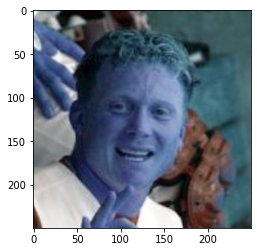

In [5]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import cv2
import os 

import torch
import torchvision
from torchvision.io import read_image
import torchvision.transforms as T

from google.colab.patches import cv2_imshow



# folder="/content/drive/MyDrive/Colab Notebooks/pytorch-CycleGAN-and-pix2pix-master/datasets/faces/train/Aaron_Eckhart/Aaron_Eckhart_0001.jpg"
folder='/content/drive/MyDrive/Colab Notebooks/pytorch-CycleGAN-and-pix2pix-master/datasets/faces/train_img_original/'

%cd /content/drive/MyDrive/Colab Notebooks/pytorch-CycleGAN-and-pix2pix-master/datasets/faces/train_img

hf = h5py.File('train.h5', 'w')
# images=[]
directory = os.fsencode(folder)
num=1
for file in os.listdir(directory):
     filename = os.fsdecode(file)
     img_name=filename+'_0001.jpg'
     img_path= folder + filename +'/'+img_name

    #  print(img_path)
     
     # reading source file
     img = cv2.imread(img_path)
     plt.imshow(img)
     img = cv2.resize(img,None, fx = 256/250, fy = 256/250, interpolation = cv2.INTER_CUBIC)
    # converting the image into gray-scale
     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
     img2 = cv2.medianBlur(img, 1)
           #applying adaptive threshold to use it as a mask
     edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
     
     color = cv2.bilateralFilter(img, 9, 200, 200)
      #cartoonize

     cartoon = cv2.bitwise_and(color, color, mask = edges)

     im_AB = np.concatenate([img, cartoon], 1)
     
     hf.create_dataset('%d'%(num-1), data=im_AB)
    #  images.append(im_AB)
     num += 1
     

hf.close()





"""
# reading source file
img = cv2.imread(folder)
img = cv2.resize(img,None, fx = 256/250, fy = 256/250, interpolation = cv2.INTER_CUBIC)

print(np.shape(img))

# converting the image into gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img2 = cv2.medianBlur(img, 1)

#applying adaptive threshold to use it as a mask
edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)

color = cv2.bilateralFilter(img, 9, 200, 200)

#cartoonize
cartoon = cv2.bitwise_and(color, color, mask = edges)

im_AB = np.concatenate([img, cartoon], 1)
plt.imshow(im_AB)
"""


# num=1
# filename="%d.jpg"%num
# folder="/content/drive/MyDrive/Colab Notebooks/pytorch-CycleGAN-and-pix2pix-master/datasets/pathology/train_img"
# images = []
# hf = h5py.File('train.h5', 'w')
# for filename in os.listdir(folder):
#     img = cv2.imread(os.path.join(folder,filename)).reshape(3,256,512)
#     if img is not None:

#         hf.create_dataset('%d'%(num-1), data=img)
#         images.append(img)
#     num+=1

# hf.close()
# # plt.imshow(images[num])


# # hf = h5py.File('train.h5', 'w')
# # hf.create_dataset('dataset_1', data=d1)
# # hf.create_dataset('dataset_2', data=d2)


In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import cv2
import os 


folder="/content/drive/MyDrive/Colab Notebooks/pytorch-CycleGAN-and-pix2pix-master/datasets/faces/train_img/train.h5"
hf = h5py.File(folder, 'r')
np.shape(hf)

(432,)

<KeysViewHDF5 ['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '16', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '17', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '18', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '19', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '2', '20', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '21', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '22', '220', '221', '222', '223', '224', '225', '226', '22

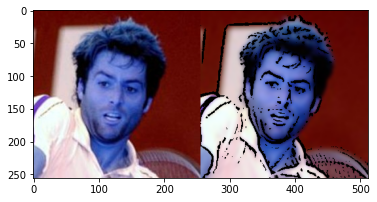

In [49]:
import matplotlib.pyplot as plt
folder="/content/drive/MyDrive/Colab Notebooks/pytorch-CycleGAN-and-pix2pix-master/datasets/faces/train_img/train.h5"

hf = h5py.File(folder, 'r')
print(hf.keys())


names=list(hf.keys())

plt.imshow(hf.get('3'),cmap='gray')




In [ ]:
    folder="/content/drive/MyDrive/Colab Notebooks/pytorch-CycleGAN-and-pix2pix-master/datasets/pathology/train/train.h5"
    path = os.path.join(folder, 'r')
    hf = h5py.File(folder,'r')
    key = list(hf.keys())[2]
    data = hf[key]
    a=dict(hf=hf, data=data)
    print(a.get(key))

None


In [ ]:
np.shape(a)

()

In [ ]:
hf.get(names)

AttributeError: ignored

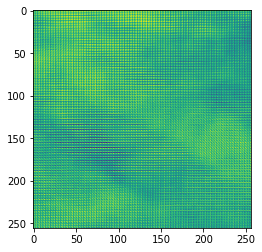

tensor([[193.0000, 180.3333, 165.3333,  ..., 152.0000, 157.6667, 155.6667],
        [195.0000, 210.3333, 158.3333,  ..., 188.6667, 189.6667, 172.6667],
        [209.3333, 207.6667, 178.0000,  ..., 183.6667, 186.0000, 189.0000],
        ...,
        [199.0000, 189.3333, 190.0000,  ..., 166.6667, 158.6667, 162.0000],
        [206.0000, 207.3333, 161.6667,  ..., 149.3333, 190.3333, 157.0000],
        [170.3333, 205.3333, 161.0000,  ..., 169.6667, 170.3333, 185.3333]],
       dtype=torch.float64)
512 256


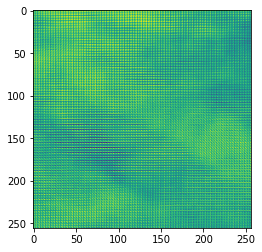

torch.Size([256, 256])

In [ ]:
import torch
dic = [ np.array(hf.get(names[i])) for i in range(len(names))]


AB=dic[0].mean(0)
AB=torch.tensor(AB)

# plt.imshow(A)

# plt.show()
h,w=(dic[0].mean(0).shape)
print(AB)

print(w,h)
w2=int(w/2)
A=AB[0:w2,0:h]

# plt.imshow(A)


# plt.show()
A.reshape(1,1,256,256)
A.shape


In [ ]:
names



['dataset_1',
 'dataset_10',
 'dataset_100',
 'dataset_101',
 'dataset_102',
 'dataset_103',
 'dataset_104',
 'dataset_105',
 'dataset_106',
 'dataset_107',
 'dataset_108',
 'dataset_109',
 'dataset_11',
 'dataset_110',
 'dataset_111',
 'dataset_112',
 'dataset_113',
 'dataset_114',
 'dataset_115',
 'dataset_116',
 'dataset_117',
 'dataset_118',
 'dataset_119',
 'dataset_12',
 'dataset_120',
 'dataset_121',
 'dataset_122',
 'dataset_123',
 'dataset_124',
 'dataset_125',
 'dataset_126',
 'dataset_127',
 'dataset_128',
 'dataset_129',
 'dataset_13',
 'dataset_130',
 'dataset_131',
 'dataset_132',
 'dataset_133',
 'dataset_134',
 'dataset_135',
 'dataset_136',
 'dataset_137',
 'dataset_138',
 'dataset_139',
 'dataset_14',
 'dataset_140',
 'dataset_141',
 'dataset_142',
 'dataset_143',
 'dataset_144',
 'dataset_145',
 'dataset_146',
 'dataset_147',
 'dataset_148',
 'dataset_149',
 'dataset_15',
 'dataset_150',
 'dataset_151',
 'dataset_152',
 'dataset_153',
 'dataset_154',
 'dataset_155',


In [ ]:
np.shape(list(hf.get(names[0])))

AttributeError: ignored